Importing Neccessary Libraries

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

Loading the dataset(File Format: CSV)

In [7]:
heart_data = pd.read_csv("C:/Users/Agniv/Desktop/Internships/devtern internship/machine learning project/Heart disease prediction project python/data set/archive/Heart_Disease_Prediction.csv")

Droping rows with missing values

In [8]:
heart_data.dropna(inplace=True)

Droping columns with missing values

In [9]:
null_columns = heart_data.columns[heart_data.isnull().any()]
heart_data.drop(columns=null_columns, inplace=True)

Selecting numeric data

In [10]:
numeric_data = heart_data.select_dtypes(include='number')

Compute the correlation matrix

In [11]:
correlation_matrix = numeric_data.corr()

Plot correlation heatmap

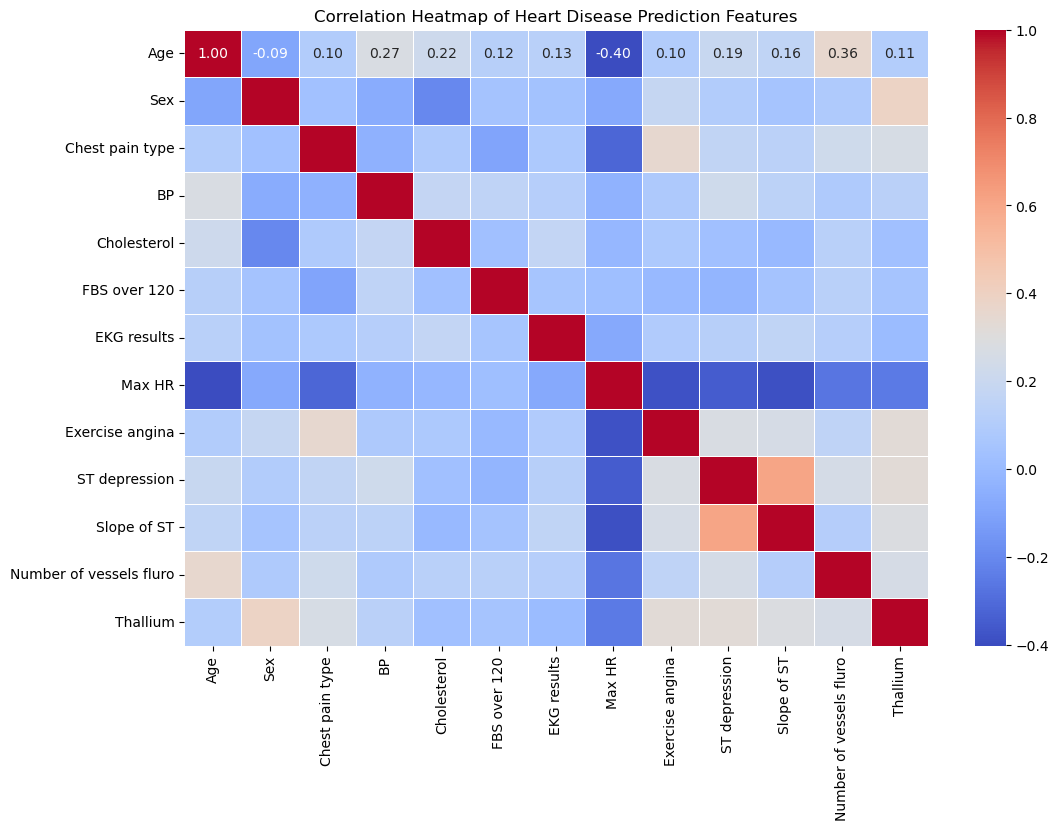

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Heart Disease Prediction Features')
plt.show()

Prepare data for modeling

In [13]:
X = heart_data.drop(columns=['Heart Disease'])
y = heart_data['Heart Disease']

Split the dataset into training and testing sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize features

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Initialize and train the logistic regression model

In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Make predictions on the test set

In [17]:
y_pred = model.predict(X_test)

Evaluate model performance

In [18]:
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, pos_label='Presence')
report = classification_report(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='Presence')
f1 = f1_score(y_test, y_pred, pos_label='Presence')
matrix = confusion_matrix(y_test, y_pred)

Print model performance metrics

In [19]:
print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Model Performance Metrics:
Accuracy: 90.74%
Precision: 90.00%
Recall: 0.8571428571428571
F1-score: 0.8780487804878048


Print predictions

In [20]:
print("Predictions:")
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions)

Predictions:
       Actual Predicted
30   Presence  Presence
116  Presence  Presence
79    Absence   Absence
127   Absence   Absence
196   Absence   Absence
137  Presence  Presence
209   Absence  Presence
45    Absence   Absence
158   Absence   Absence
247   Absence   Absence
183   Absence   Absence
268   Absence  Presence
227  Presence  Presence
82   Presence  Presence
165   Absence   Absence
194   Absence   Absence
226  Presence  Presence
146  Presence   Absence
104  Presence  Presence
60    Absence   Absence
221  Presence  Presence
266   Absence   Absence
46   Presence  Presence
42    Absence   Absence
185   Absence   Absence
9    Presence  Presence
22    Absence   Absence
199  Presence  Presence
109   Absence   Absence
24    Absence   Absence
113   Absence   Absence
68    Absence   Absence
144  Presence  Presence
224   Absence   Absence
252  Presence   Absence
6    Presence  Presence
120  Presence  Presence
67   Presence   Absence
119  Presence  Presence
118   Absence   Absence
25 

Print classification report

In [21]:
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

     Absence       0.91      0.94      0.93        33
    Presence       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



Print confusion matrix

In [22]:
print("\nConfusion Matrix:")
print(matrix)


Confusion Matrix:
[[31  2]
 [ 3 18]]


Extract and print model coefficients

In [23]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print("\nModel Coefficients:")
print(coefficients)


Model Coefficients:
                    Feature  Coefficient
11  Number of vessels fluro     0.839802
2           Chest pain type     0.636769
1                       Sex     0.631968
12                 Thallium     0.570379
9             ST depression     0.515319
3                        BP     0.433270
8           Exercise angina     0.382960
10              Slope of ST     0.336019
4               Cholesterol     0.285084
6               EKG results     0.066943
0                       Age    -0.082026
7                    Max HR    -0.210618
5              FBS over 120    -0.323487
